In [4]:
"""
Link for the presentation : https://slides.com/nellycornejo/deck
"""



import numpy as np
import pandas as pd
import re

# Original dataset : https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=84164ENG&_theme=1058
# The original data set has 90.000 cells but since it allows to apply filters I reduced it a lot.

data = pd.read_csv('/Users/nelly/Downloads/data.csv', sep=';')
data = data.drop('ID', axis=1)

# renamne columns
data = data.rename(columns={"EmploymentType": "Job_type", "SectorBranchesSIC2008": "Sector", "Periods": "Year" , "EmployedPersons_1": "Employed_people", "Jobs_2": "Jobs", "HoursWorked_4": "Hours_worked" })


# rename columns (replace cbs codes) for better redability

data['Sex'] = np.where(data['Sex'] == 4000, 'Women', data['Sex']) 
data['Sex'] = np.where(data['Sex'] == '3000', 'Men', data['Sex']) 

data['Job_type'] = np.where(data['Job_type'] == 'A045285', 'Employee', data['Job_type']) 
data['Job_type'] = np.where(data['Job_type'] == 'A045286', 'Self Employed', data['Job_type']) 

data['Sector'] = np.where(data['Sector'] == 394100, 'Telecommunications', data['Sector']) 
data['Sector'] = np.where(data['Sector'] == '403405', 'Management Technical Consultancy', data['Sector']) 
data['Sector'] = np.where(data['Sector'] == '300010', 'Business Services', data['Sector']) 
data['Sector'] = np.where(data['Sector'] == '395005', 'IT and info services', data['Sector']) 

data.head()





,Sex,Job_type,Sector,Year,Employed_people,Jobs,Hours_worked
0,Men,Employee,Telecommunications,2010JJ00,22,22,38
1,Men,Employee,Telecommunications,2011JJ00,22,22,38
2,Men,Employee,Telecommunications,2012JJ00,22,22,37
3,Men,Employee,Telecommunications,2013JJ00,22,22,38
4,Men,Employee,Telecommunications,2014JJ00,22,22,39


In [5]:
#change data type str to int in columns

data['Employed_people'] = data['Employed_people'].astype(int)

#change employed people and Hours_worked numbers

data.loc[:,'Employed_people'] *= 1000
data.loc[:,'Jobs'] *= 1000
data.loc[:,'Hours_worked'] *= 1000000

data.query("Sector == 'Business Services' & Job_type == 'Employee'")

data

,Sex,Job_type,Sector,Year,Employed_people,Jobs,Hours_worked
0,Men,Employee,Telecommunications,2010JJ00,22000,22000,38000000
1,Men,Employee,Telecommunications,2011JJ00,22000,22000,38000000
2,Men,Employee,Telecommunications,2012JJ00,22000,22000,37000000
3,Men,Employee,Telecommunications,2013JJ00,22000,22000,38000000
4,Men,Employee,Telecommunications,2014JJ00,22000,22000,39000000
...,...,...,...,...,...,...,...
155,Women,Self Employed,Management Technical Consultancy,2015JJ00,37000,52000,65000000
156,Women,Self Employed,Management Technical Consultancy,2016JJ00,39000,54000,66000000
157,Women,Self Employed,Management Technical Consultancy,2017JJ00,40000,56000,68000000
158,Women,Self Employed,Management Technical Consultancy,2018JJ00,41000,57000,69000000


In [73]:
# Changing the format of year

data['Year'] = data['Year'].str[:4]

data

data.tail()

,Sex,Job_type,Sector,Year,Employed_people,Jobs,Hours_worked
155,Women,Self Employed,Management Technical Consultancy,2015,37000,52000,65000000
156,Women,Self Employed,Management Technical Consultancy,2016,39000,54000,66000000
157,Women,Self Employed,Management Technical Consultancy,2017,40000,56000,68000000
158,Women,Self Employed,Management Technical Consultancy,2018,41000,57000,69000000
159,Women,Self Employed,Management Technical Consultancy,2019,41000,59000,70000000


In [17]:
# Selecting telecommunications sector for only employed people (not self employed)

Telec = data.query("Sector == 'Telecommunications' & Job_type == 'Employee'")
Telec

Business = data.query("Sector == 'Business Services' & Sex == 'Men'")
Business

,Sex,Job_type,Sector,Year,Employed_people,Jobs,Hours_worked
20,Men,Employee,Business Services,2010,733000,800000,1137000000
21,Men,Employee,Business Services,2011,750000,817000,1166000000
22,Men,Employee,Business Services,2012,744000,810000,1152000000
23,Men,Employee,Business Services,2013,740000,805000,1150000000
24,Men,Employee,Business Services,2014,757000,821000,1187000000
25,Men,Employee,Business Services,2015,803000,862000,1241000000
26,Men,Employee,Business Services,2016,842000,901000,1308000000
27,Men,Employee,Business Services,2017,886000,951000,1378000000
28,Men,Employee,Business Services,2018,923000,990000,1429000000
29,Men,Employee,Business Services,2019,929000,996000,1441000000


In [5]:
# Selecting Men in Telecommunications sector and find total hours worked from 2010-2019

Telec = data.query("Sector == 'Telecommunications' & Job_type == 'Employee'")

Telec_men = Telec.query("Sex == 'Men'")
Telec_men_hours = Telec_men['Hours_worked'].sum()
Telec_avg_men = Telec_men['Hours_worked'].mean()


print(Telec_men_hours, 'total hours worked from 2010-2019 (Millions)')
print(Telec_avg_men,'average hours worked per year (Millions)')

Telec_men 

378000000 total hours worked from 2010-2019 (Millions)
37800000.0 average hours worked per year (Millions)


,Sex,Job_type,Sector,Year,Employed_people,Jobs,Hours_worked
0,Men,Employee,Telecommunications,2010,22000,22000,38000000
1,Men,Employee,Telecommunications,2011,22000,22000,38000000
2,Men,Employee,Telecommunications,2012,22000,22000,37000000
3,Men,Employee,Telecommunications,2013,22000,22000,38000000
4,Men,Employee,Telecommunications,2014,22000,22000,39000000
5,Men,Employee,Telecommunications,2015,22000,22000,38000000
6,Men,Employee,Telecommunications,2016,22000,22000,39000000
7,Men,Employee,Telecommunications,2017,23000,23000,39000000
8,Men,Employee,Telecommunications,2018,22000,22000,37000000
9,Men,Employee,Telecommunications,2019,21000,21000,35000000


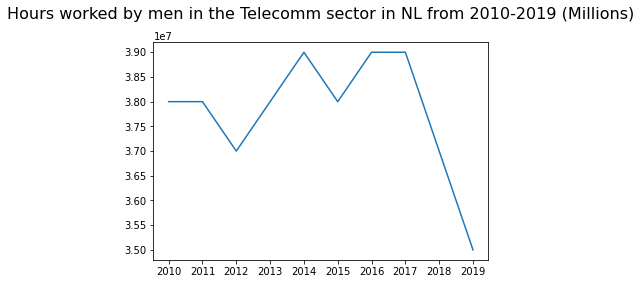

In [6]:
import matplotlib
import matplotlib.pyplot as plt

#Ploting Hours worked by men in the Telecomm sector in NL from 2010-2019 (Millions)

title = 'Hours worked by men in the Telecomm sector in NL from 2010-2019 (Millions)' 
year = Telec_men['Year']
hours = Telec_men['Hours_worked']

plt.plot(year,hours)
plt.title(title + "\n", fontsize=16)
plt.show()



In [7]:
# Selecting Women in Telecommunications and find total hours worked from 2010-2019

Telec_women = Telec.query("Sex == 'Women'")

Telec_women_hours = Telec_women['Hours_worked'].sum()
Telec_avg_women = Telec_women['Hours_worked'].mean()
print(Telec_women_hours,'total hours worked from 2010-2019 (Millions)' )
print(Telec_avg_women,'average hours worked per year (Millions)')

125000000 total hours worked from 2010-2019 (Millions)
12500000.0 average hours worked per year (Millions)


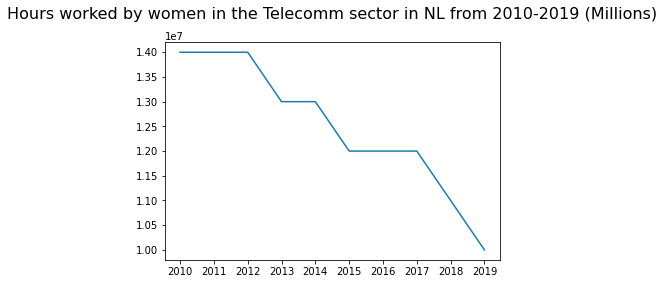

In [8]:
#Ploting Hours worked by men in the Telecomm sector in NL from 2010-2019 (Millions)

title = 'Hours worked by women in the Telecomm sector in NL from 2010-2019 (Millions)' 
year = Telec_women['Year']
hours = Telec_women['Hours_worked']

plt.plot(year,hours)
plt.title(title + "\n", fontsize=16)
plt.show()

In [9]:
# Dropping columns to better do the sum of total hours worked  by telecom sector 

Telec_hours = Telec.drop('Employed_people', axis=1)
Telec_hours = Telec.drop('Jobs', axis=1)
Telec_hours = Telec.drop('Job_type', axis=1)

Telec_hours

Telec_hours.groupby(['Sex','Sector'])['Hours_worked'].agg('sum')
#Telec_hours1

Sex    Sector            
Men    Telecommunications    378000000
Women  Telecommunications    125000000
Name: Hours_worked, dtype: int64

In [77]:
# Finding the total amount of people employed by sector between 2010-2019


data

data.groupby(['Sex','Sector'])['Employed_people'].agg('sum')

Sex    Sector                          
Men    Business Services                   9667000
       IT and info services                1516000
       Management Technical Consultancy    3254000
       Telecommunications                   220000
Women  Business Services                   8824000
       IT and info services                 384000
       Management Technical Consultancy    1904000
       Telecommunications                    86000
Name: Employed_people, dtype: int64

In [81]:
# Finding the total of number of men and women employed by sector by year 


employees = data.groupby(['Year','Sector','Sex'])['Employed_people'].agg('sum')


employees

Year  Sector                            Sex  
2010  Business Services                 Men      870000
                                        Women    823000
      IT and info services              Men      133000
                                        Women     31000
      Management Technical Consultancy  Men      304000
                                                  ...  
2019  IT and info services              Women     52000
      Management Technical Consultancy  Men      359000
                                        Women    207000
      Telecommunications                Men       21000
                                        Women      7000
Name: Employed_people, Length: 80, dtype: int64

In [87]:
# Getting just the result for the past 3 years

employees.iloc[56:]

Year  Sector                            Sex  
2017  Business Services                 Men      1049000
                                        Women     939000
      IT and info services              Men       165000
                                        Women      44000
      Management Technical Consultancy  Men       339000
                                        Women     193000
      Telecommunications                Men        23000
                                        Women       8000
2018  Business Services                 Men      1089000
                                        Women     969000
      IT and info services              Men       173000
                                        Women      48000
      Management Technical Consultancy  Men       349000
                                        Women     200000
      Telecommunications                Men        22000
                                        Women       7000
2019  Business Services                 Me